In [1]:
# Telecom Customer Churn Prediction
## Libraries
#Imported necessary libraries for data analysis, visualization, and modeling.

In [77]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix,roc_curve, roc_auc_score

In [3]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

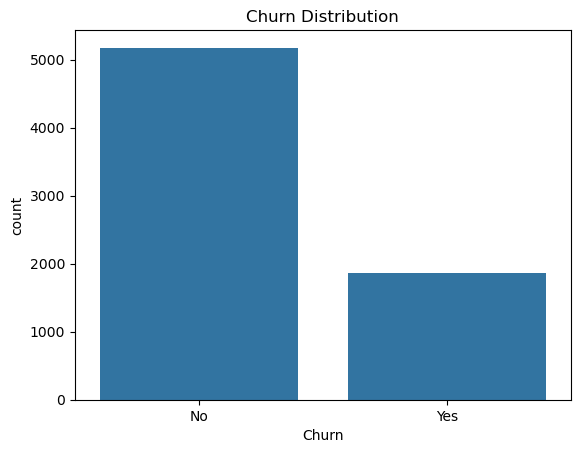

In [9]:
sns.countplot(x="Churn", data=df)
plt.title('Churn Distribution')
plt.show()

In [10]:
# 2. Detailed Exploratory Data Analysis 
#Exploring relationship between features an Churn to identify key drivers.

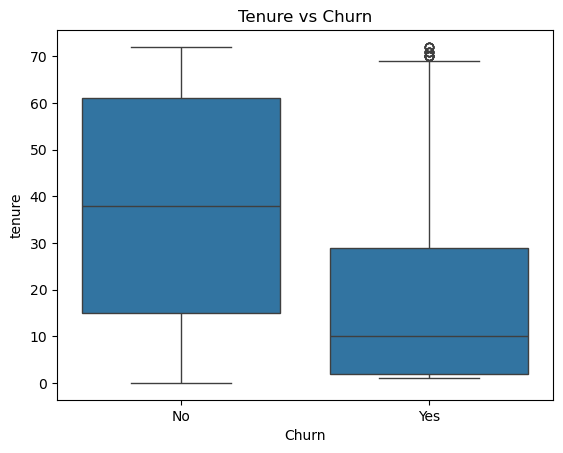

In [11]:
sns.boxplot(x="Churn", y="tenure",data=df)
plt.title("Tenure vs Churn")
plt.show()

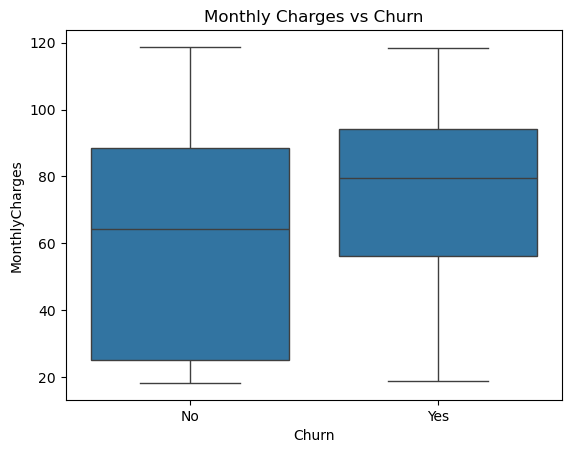

In [12]:
sns.boxplot(x="Churn",y="MonthlyCharges" ,data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

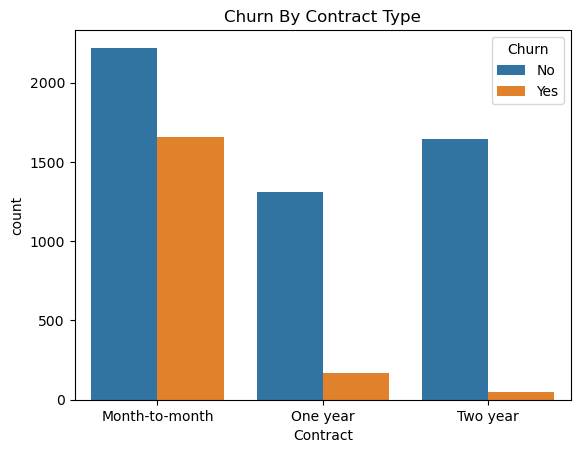

In [13]:
#Churn by contract type 
sns.countplot(x='Contract', hue ='Churn', data=df)
plt.title("Churn By Contract Type")
plt.show()



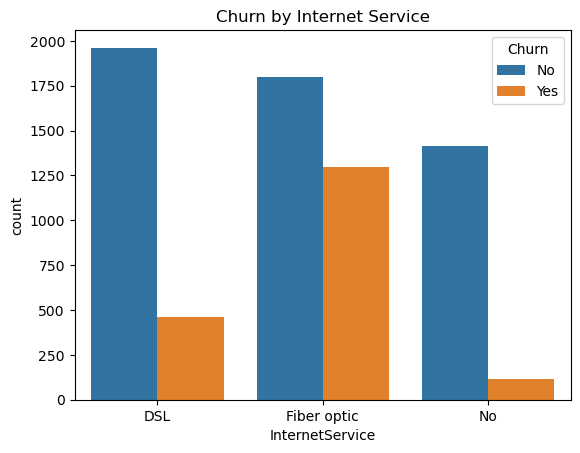

In [14]:
# Churn by Internet Service
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by Internet Service')
plt.show()

In [15]:
### Observations
'''- Customers who churn tend to have shorter tenure (e.g., median ~10 months vs. 40 for non-churn).
- Month-to-month contracts show a higher churn rate than one-year or two-year contracts.
- [Add insights from your plots, e.g., "Fiber optic users have higher churn."]'''

'- Customers who churn tend to have shorter tenure (e.g., median ~10 months vs. 40 for non-churn).\n- Month-to-month contracts show a higher churn rate than one-year or two-year contracts.\n- [Add insights from your plots, e.g., "Fiber optic users have higher churn."]'

In [16]:
## 3. Correlation Analysis and Additional Features
#Analyzing correlations and exploring more features to confirm churn drivers.

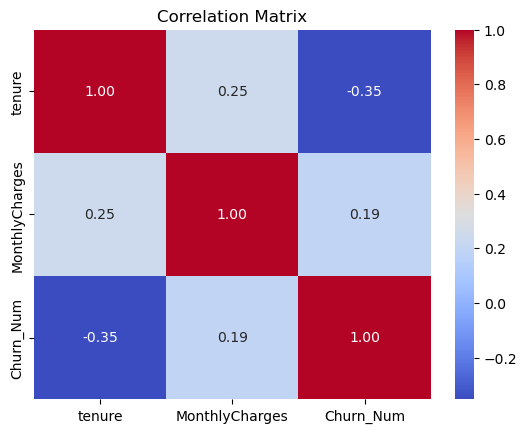

In [17]:
# Convert Churn to numerical
df['Churn_Num'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Correlation matrix for numerical features
numerical_cols = ['tenure', 'MonthlyCharges', 'Churn_Num']
corr_matrix = df[numerical_cols].corr()

# Heatmap of correlations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

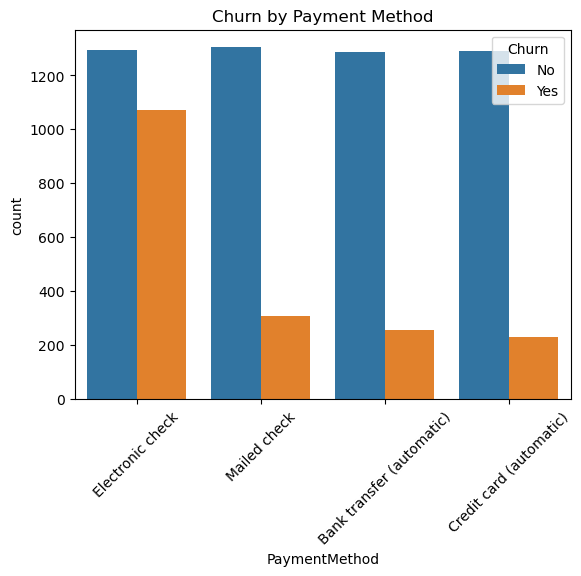

In [18]:
# Churn by Payment Method
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn by Payment Method')
plt.xticks(rotation=45)
plt.show()

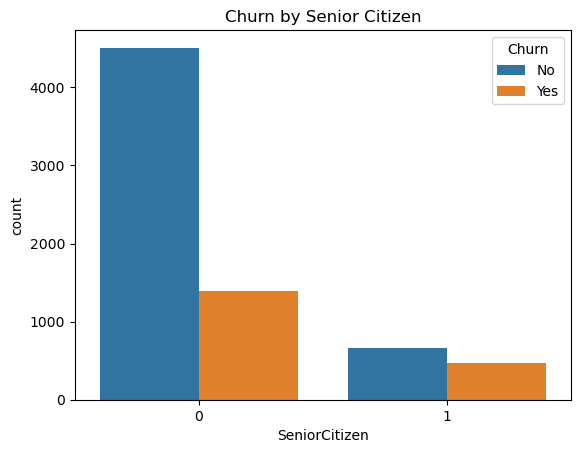

In [19]:
# Churn by Senior Citizen
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title('Churn by Senior Citizen')
plt.show()

In [20]:
### Observations
'''
- Tenure has a [e.g., negative] correlation with Churn ([e.g., -0.35]), indicating longer tenure reduces churn likelihood.
- [e.g., Electronic check users have a higher churn rate than automatic payment users.]
- [e.g., Senior citizens show slightly higher churn.]
'''

'\n- Tenure has a [e.g., negative] correlation with Churn ([e.g., -0.35]), indicating longer tenure reduces churn likelihood.\n- [e.g., Electronic check users have a higher churn rate than automatic payment users.]\n- [e.g., Senior citizens show slightly higher churn.]\n'

In [21]:
## 4. Data Preprocessing
'''
Preparing data for logistic regression by handling missing values, encoding categorical variables, and scaling numerical features.
'''

'\nPreparing data for logistic regression by handling missing values, encoding categorical variables, and scaling numerical features.\n'

In [22]:
# Check missing values
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Churn_Num           0
dtype: int64


In [23]:
# Convert TotalCharges to numeric, handle blanks
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)
# Verify no missing values
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Churn_Num           0
dtype: int64


C:\Users\udita\AppData\Local\Temp\ipykernel_5984\3919109344.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


In [24]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges    Churn_Num
count    7043.000000  7043.000000     7043.000000   7043.000000  7043.000000
mean        0.162147    32.371149       64.761692   2283.300441     0.265370
std         0.368612    24.559481       30.090047   2265.000258     0.441561
min         0.000000     0.000000       18.250000     18.800000     0.000000
25%         0.000000     9.000000       35.500000    402.225000     0.000000
50%         0.000000    29.000000       70.350000   1400.550000     0.000000
75%         0.000000    55.000000       89.850000   3786.600000     1.000000
max         1.000000    72.000000      118.750000   8684.800000     1.000000


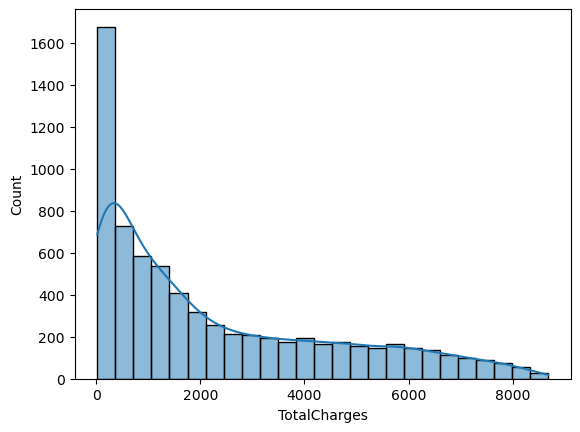

In [25]:
sns.histplot(df['TotalCharges'], kde=True)
plt.show()

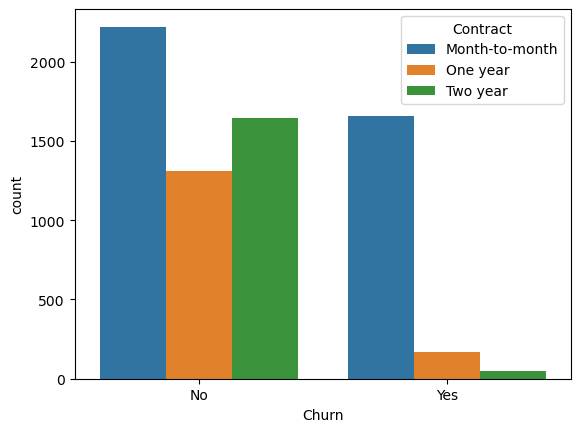

In [26]:
sns.countplot(x='Churn', hue='Contract', data=df)
plt.show()

In [27]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [28]:
X = df_encoded.drop('Churn_Yes', axis=1)  # Or however your target is encoded
y = df_encoded['Churn_Yes']


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=2000)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1036
        True       1.00      1.00      1.00       373

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

Accuracy: 1.0


In [65]:
y_pred = model.predict(X_test)


In [67]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      1036
        True       1.00      1.00      1.00       373

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409


Confusion Matrix:
 [[1036    0]
 [   0  373]]


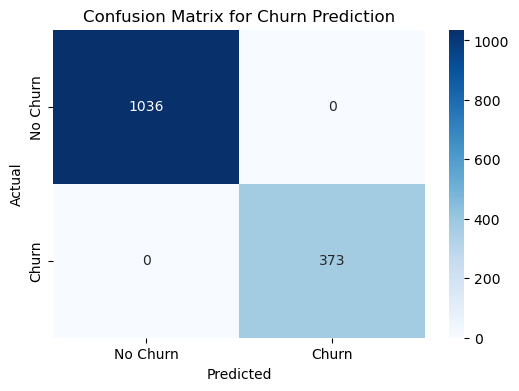

In [73]:
# Predict churn labels on test data
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it nice and clean
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Churn Prediction')
plt.show()

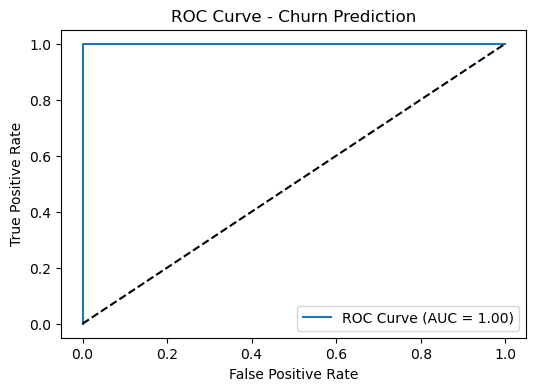

In [79]:
# Get predicted probabilities for the "churn" class
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC score
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0,1], [0,1], 'k--')  # Baseline: random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Churn Prediction')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Get feature names and their coefficients
feature_names = X_train.columns
coefficients = model.coef_[0]

# Create DataFrame
feat_imp = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by absolute value for importance
feat_imp['abs_coeff'] = feat_imp['Coefficient'].abs()
feat_imp = feat_imp.sort_values(by='abs_coeff', ascending=False)

# Plot top features
plt.figure(figsize=(8,6))
sns.barplot(x='Coefficient', y='Feature', data=feat_imp)
plt.title('Feature Importance from Logistic Regression')
plt.show()